In [47]:
import pandas as pd
import cv2
from typing import Type
import matplotlib.pyplot as plt

Functions for the lab

In [107]:
def img_height(path: str) -> int:
    '''return characteristic of img '''
    img = cv2.imread(path)
    return img.shape[0]


def img_width(path: str) -> int:
    '''return characteristic of img '''
    img = cv2.imread(path)
    return img.shape[1]


def img_channels(path: str) -> int:
    '''return characteristic of img '''
    img = cv2.imread(path)
    return img.shape[2]


def img_pixels(path: str) -> int:
    '''return characteristic of img '''
    img = cv2.imread(path)
    return img.size


def df_filter_class(dfSrc: pd.DataFrame, class_name: str) -> pd.DataFrame:
    '''filter using class name as referens'''
    return dfSrc[dfSrc.img_class == class_name]


def df_filter_dimentions(dfSrc: pd.DataFrame, class_name: str, h: int, w: int) -> pd.DataFrame:
    '''filter df to df with certain class name and h and w'''
    return dfSrc[(dfSrc.height <= h) & (dfSrc.width <= w) & (dfSrc.img_class == class_name)]

# def filter_by_size(input_df: pd.DataFrame, value: int, w_or_h: bool) -> pd.DataFrame:
#     '''
#     if sort parameter = width => w_or_h = True, else w_or_h = False
#     '''
#     if w_or_h:
#         mask = (input_df.width <= int(value))
#     else:
#         mask = (input_df.hight <= int(value))
#     new_df = (input_df[mask])
#     return new_df


def stats_with_pixels(df: pd.DataFrame, class_name: str) -> None:
    df['pixel'] = df['path'].apply(img_pixels)
    df = df_filter_class(df, class_name)
    df.groupby('pixel').count()
    print(df.pixel.describe())


def create_histogram(df: pd.DataFrame, class_name: str) -> Type:
    '''create array contained b g r channels'''
    df = df_filter_class(df, class_name)
    # print(df.sample().iloc[0]['path'])
    image = cv2.imread(df.sample().iloc[0]['path'])
    color = ('b', 'g', 'r')
    result = [[], []]
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        result[0].append(histr)
        result[1].append(col)
    return result


def draw_histrogram(df: pd.DataFrame, class_name: str) -> None:
    '''draw histogram'''
    tmp = create_histogram(df, class_name)
    for i in range(len(tmp[0])):
        plt.plot(tmp[0][i], color=tmp[1][i])
        plt.xlim([0, 256])
    plt.xlabel("Intensity")
    plt.ylabel("Number of pixels")
    plt.show()


Create df rename cols and add class_mark

In [50]:
path1 = "dataset/zebra/zebra_annotation.csv"
path2 = "dataset/bay horse/bay horse_annotation.csv"
dfs = []
tmp = pd.read_csv(path1, sep=',', header=None)
dfs.append(tmp)
tmp = pd.read_csv(path2, sep=',', header=None)
dfs.append(tmp)
df = pd.concat(dfs)
df.drop(1, axis=1, inplace=True)
df.rename(columns={0: 'path', 2: 'img_class'}, inplace=True)

df['mark'] = (df['img_class'] != 'zebra') * int(1)


show

In [51]:
df

,path,img_class,mark
0,D:\Git\pyLab3_3sem\dataset\zebra\0000.jpg,zebra,0
1,D:\Git\pyLab3_3sem\dataset\zebra\0001.jpg,zebra,0
2,D:\Git\pyLab3_3sem\dataset\zebra\0002.jpg,zebra,0
3,D:\Git\pyLab3_3sem\dataset\zebra\0003.jpg,zebra,0
4,D:\Git\pyLab3_3sem\dataset\zebra\0004.jpg,zebra,0
...,...,...,...
1066,D:\Git\pyLab3_3sem\dataset\bay horse\1252.jpg,bay horse,1
1067,D:\Git\pyLab3_3sem\dataset\bay horse\1253.jpg,bay horse,1
1068,D:\Git\pyLab3_3sem\dataset\bay horse\1254.jpg,bay horse,1
1069,D:\Git\pyLab3_3sem\dataset\bay horse\1255.jpg,bay horse,1


Add 3 cols for img's specs

In [53]:
df['height'] = df['path'].apply(img_height)
df['width'] = df['path'].apply(img_width)
df['channels'] = df['path'].apply(img_channels)


In [54]:
df


,path,img_class,mark,height,width,channels
0,D:\Git\pyLab3_3sem\dataset\zebra\0000.jpg,zebra,0,315,480,3
1,D:\Git\pyLab3_3sem\dataset\zebra\0001.jpg,zebra,0,320,480,3
2,D:\Git\pyLab3_3sem\dataset\zebra\0002.jpg,zebra,0,320,480,3
3,D:\Git\pyLab3_3sem\dataset\zebra\0003.jpg,zebra,0,300,480,3
4,D:\Git\pyLab3_3sem\dataset\zebra\0004.jpg,zebra,0,300,480,3
...,...,...,...,...,...,...
1066,D:\Git\pyLab3_3sem\dataset\bay horse\1252.jpg,bay horse,1,320,480,3
1067,D:\Git\pyLab3_3sem\dataset\bay horse\1253.jpg,bay horse,1,320,480,3
1068,D:\Git\pyLab3_3sem\dataset\bay horse\1254.jpg,bay horse,1,320,432,3
1069,D:\Git\pyLab3_3sem\dataset\bay horse\1255.jpg,bay horse,1,320,320,3


Chapter 5 in lab task

In [ ]:
df.describe()


show filter function

In [63]:
test = df_filter_class(df, 'zebra')
test


,path,img_class,mark,height,width,channels
0,D:\Git\pyLab3_3sem\dataset\zebra\0000.jpg,zebra,0,315,480,3
1,D:\Git\pyLab3_3sem\dataset\zebra\0001.jpg,zebra,0,320,480,3
2,D:\Git\pyLab3_3sem\dataset\zebra\0002.jpg,zebra,0,320,480,3
3,D:\Git\pyLab3_3sem\dataset\zebra\0003.jpg,zebra,0,300,480,3
4,D:\Git\pyLab3_3sem\dataset\zebra\0004.jpg,zebra,0,300,480,3
...,...,...,...,...,...,...
1136,D:\Git\pyLab3_3sem\dataset\zebra\1163.jpg,zebra,0,320,480,3
1137,D:\Git\pyLab3_3sem\dataset\zebra\1164.jpg,zebra,0,320,427,3
1138,D:\Git\pyLab3_3sem\dataset\zebra\1165.jpg,zebra,0,320,398,3
1139,D:\Git\pyLab3_3sem\dataset\zebra\1167.jpg,zebra,0,267,480,3


show filter work

In [92]:
test1 = df_filter_dimentions(df, 'bay horse', 280, 480)
test1


,path,img_class,mark,height,width,channels
33,D:\Git\pyLab3_3sem\dataset\bay horse\0033.jpg,bay horse,1,270,480,3
66,D:\Git\pyLab3_3sem\dataset\bay horse\0066.jpg,bay horse,1,226,480,3
140,D:\Git\pyLab3_3sem\dataset\bay horse\0143.jpg,bay horse,1,270,480,3
143,D:\Git\pyLab3_3sem\dataset\bay horse\0146.jpg,bay horse,1,252,480,3
160,D:\Git\pyLab3_3sem\dataset\bay horse\0164.jpg,bay horse,1,270,480,3
189,D:\Git\pyLab3_3sem\dataset\bay horse\0194.jpg,bay horse,1,270,480,3
226,D:\Git\pyLab3_3sem\dataset\bay horse\0232.jpg,bay horse,1,270,480,3
232,D:\Git\pyLab3_3sem\dataset\bay horse\0239.jpg,bay horse,1,270,480,3
291,D:\Git\pyLab3_3sem\dataset\bay horse\0302.jpg,bay horse,1,273,480,3
315,D:\Git\pyLab3_3sem\dataset\bay horse\0328.jpg,bay horse,1,270,480,3


In [100]:
df['pixel'] = df['path'].apply(img_pixels)
df

,path,img_class,mark,height,width,channels,pixel
0,D:\Git\pyLab3_3sem\dataset\zebra\0000.jpg,zebra,0,315,480,3,453600
1,D:\Git\pyLab3_3sem\dataset\zebra\0001.jpg,zebra,0,320,480,3,460800
2,D:\Git\pyLab3_3sem\dataset\zebra\0002.jpg,zebra,0,320,480,3,460800
3,D:\Git\pyLab3_3sem\dataset\zebra\0003.jpg,zebra,0,300,480,3,432000
4,D:\Git\pyLab3_3sem\dataset\zebra\0004.jpg,zebra,0,300,480,3,432000
...,...,...,...,...,...,...,...
1066,D:\Git\pyLab3_3sem\dataset\bay horse\1252.jpg,bay horse,1,320,480,3,460800
1067,D:\Git\pyLab3_3sem\dataset\bay horse\1253.jpg,bay horse,1,320,480,3,460800
1068,D:\Git\pyLab3_3sem\dataset\bay horse\1254.jpg,bay horse,1,320,432,3,414720
1069,D:\Git\pyLab3_3sem\dataset\bay horse\1255.jpg,bay horse,1,320,320,3,307200


show stability of stats function

In [108]:
stats_with_pixels(df, 'zebra')

count      1141.000000
mean     408340.753725
std       68391.652274
min      201600.000000
25%      388800.000000
50%      432000.000000
75%      460800.000000
max      460800.000000
Name: pixel, dtype: float64


show work of draw_histogram

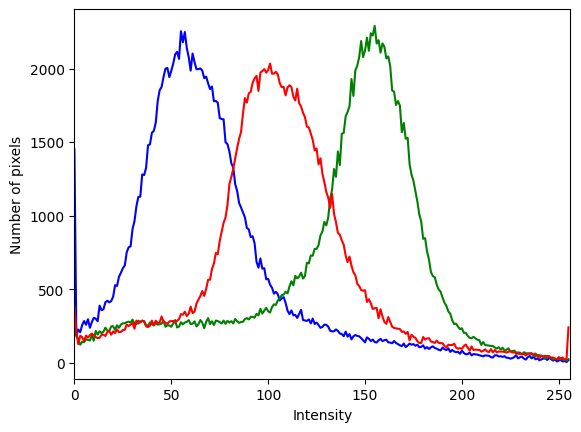

In [113]:
draw_histrogram(df, 'zebra')